In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import fasttext

## Data exploration

In [2]:
train_data = pd.read_csv("train_submission.csv")
print(f"dataset size: {train_data.shape}")

dataset size: (190599, 3)


In [3]:
train_data.head()

,Usage,Text,Label
0,Public,َ قَالَ النَّبِيُّ ص إِنِّي أَتَعَجَّبُ مِمَّن...,hau
1,Public,Filmen forteller historien om Will Hunting en...,nob
2,Public,An Arthrostylidium berryi in uska species han ...,wln
3,Public,Kancunarí enemigosniyquichejta munacuychej al...,quh
4,Public,Warmeqa ama yachachichunchu hermanospa tantaku...,quh


In [4]:
train_data = train_data.dropna(subset=["Label"])

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190099 entries, 0 to 190598
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Usage   190099 non-null  object
 1   Text    190099 non-null  object
 2   Label   190099 non-null  object
dtypes: object(3)
memory usage: 5.8+ MB


In [6]:
# Find duplicated texts
duplicated_texts = train_data[train_data.duplicated(subset=["Text"], keep=False)]

print(f"Total duplicated instances: {duplicated_texts.shape[0]}")
duplicated_texts.sort_values(by="Text").head(20)

Total duplicated instances: 76


,Usage,Text,Label
189233,Public,(b) Iminyaka emithathu sele idlulile ikoro ikh...,nde
140827,Public,(b) Iminyaka emithathu sele idlulile ikoro ikh...,nbl
133968,Public,2006: Páginas da Vida ... Marina Andrade Rangel,srn
54491,Public,2006: Páginas da Vida ... Marina Andrade Rangel,csb
90599,Public,Abahloli ababuya kumasipala bazakuqalisisa iko...,nde
46305,Public,Abahloli ababuya kumasipala bazakuqalisisa iko...,nbl
74551,Public,Campbell Lyle; & Mithun Marianne (Eds.). (19...,hsb
44634,Public,Campbell Lyle; & Mithun Marianne (Eds.). (19...,rmy
64261,Public,Da Ort hod bei da Voikszejung 94,hin
178069,Public,Da Ort hod bei da Voikszejung 94,mwl


In [7]:
# train_data = train_data[~train_data.duplicated(subset=["Text"], keep=False)].reset_index(drop=True) # keep=False removes all occurrences

In [8]:
print(train_data.shape[0])

190099


In [9]:
train_data["Label"].value_counts()

Label
tgk    1500
kur    1000
hin    1000
aze    1000
bak    1000
       ... 
tvl       2
toi       1
kua       1
gcr       1
gaa       1
Name: count, Length: 389, dtype: int64

In [10]:
label_counts = train_data["Label"].value_counts()

# Filter out labels with less than 10 instances
valid_labels = label_counts[label_counts >= 5].index
train_data = train_data[train_data["Label"].isin(valid_labels)]

print(f"New dataset size after filtering: {train_data.shape}")

New dataset size after filtering: (190074, 3)


In [11]:
train_data["Label"].value_counts()

Label
tgk    1500
kur    1000
hin    1000
aze    1000
bak    1000
       ... 
ksw      13
iba      10
ngl       7
quz       5
teo       5
Name: count, Length: 377, dtype: int64

In [12]:
model = fasttext.FastText.load_model("lid.176.bin")

train_data["FastText_Lang"] = train_data["Text"].apply(
    lambda x: model.predict(str(x))[0][0].replace("__label__", "") if isinstance(x, str) else "unknown"
)

In [13]:
train_data["FastText_Lang"].value_counts()

FastText_Lang
en     24619
es     12446
id      6549
tl      6310
it      5333
       ...  
hif        6
te         5
xal        4
rue        3
pfl        2
Name: count, Length: 174, dtype: int64

In [14]:
print((train_data["FastText_Lang"] == "unknown").sum())

0


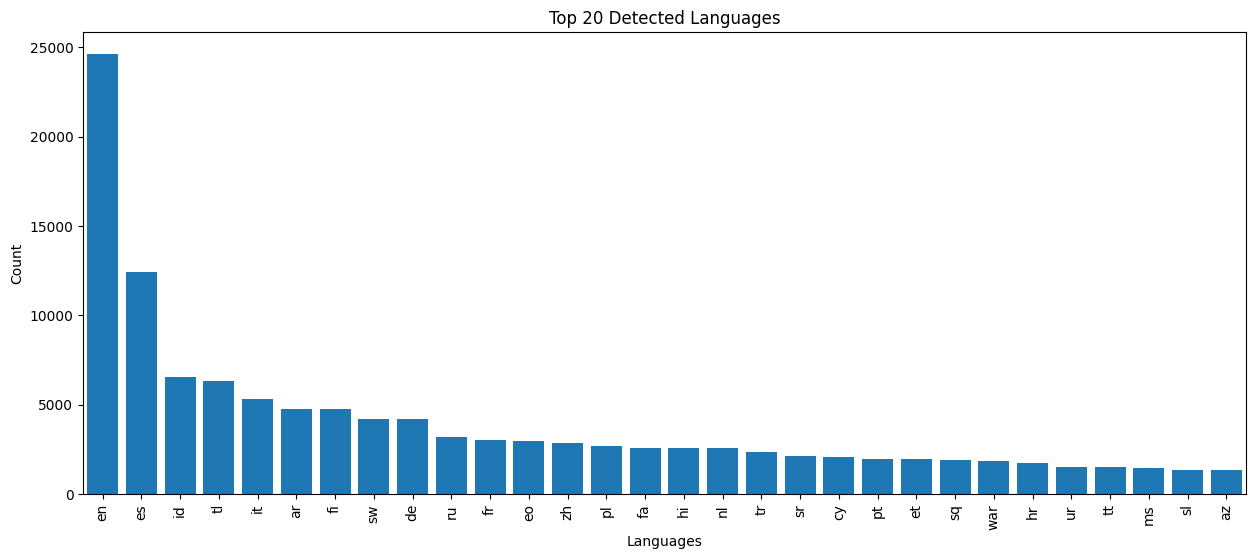

In [15]:
# Get the top 20 languages
top_20_languages = train_data["FastText_Lang"].value_counts().nlargest(30)

plt.figure(figsize=(15, 6))
plt.bar(range(len(top_20_languages)), top_20_languages.values, width=0.8)
plt.xticks(range(len(top_20_languages)), top_20_languages.index, rotation=90, fontsize=10)
plt.xlabel("Languages")
plt.ylabel("Count")
plt.title("Top 20 Detected Languages")
plt.xlim(-0.5, len(top_20_languages) - 0.5)
plt.show()

In [16]:
train_data["FastText_Lang"].value_counts().head(10)

FastText_Lang
en    24619
es    12446
id     6549
tl     6310
it     5333
ar     4772
fi     4769
sw     4201
de     4182
ru     3180
Name: count, dtype: int64

## Fine-tunning

In [17]:
df = train_data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190074 entries, 0 to 190598
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Usage          190074 non-null  object
 1   Text           190074 non-null  object
 2   Label          190074 non-null  object
 3   FastText_Lang  190074 non-null  object
dtypes: object(4)
memory usage: 7.3+ MB


In [18]:
df['Label'].value_counts()

Label
tgk    1500
kur    1000
hin    1000
aze    1000
bak    1000
       ... 
ksw      13
iba      10
ngl       7
quz       5
teo       5
Name: count, Length: 377, dtype: int64

In [19]:
import torch
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from transformers import get_scheduler
from tqdm.auto import tqdm

In [20]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [21]:
label_to_int = {label: i for i, label in enumerate(df["Label"].unique())}
df["Label"] = df["Label"].map(label_to_int)

In [22]:
# Stratified split (80% Train, 20% Validation)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df["Text"].tolist(),
    df["Label"].tolist(),
    test_size=0.2,
    stratify=df["Label"],
    random_state=42
)

In [23]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased", use_fast=True)

In [24]:
def tokenize_function(texts):
    return tokenizer(texts, padding="max_length", truncation=True, max_length=256, return_tensors="pt")

In [25]:
train_encodings = tokenize_function(train_texts)
val_encodings = tokenize_function(val_texts)

In [26]:
class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

In [27]:
train_dataset = TextDataset(train_encodings, train_labels)
val_dataset = TextDataset(val_encodings, val_labels)

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=16)
val_dataloader = DataLoader(val_dataset, batch_size=16)

In [28]:
num_labels = len(label_to_int)
print(num_labels)

377


In [29]:
model = AutoModelForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=num_labels)
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [30]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

In [31]:
classes = np.array(list(label_to_int.values()))

# Compute class weights based on inverse frequency
class_weights = compute_class_weight('balanced', classes=classes, y=df["Label"].values)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Define weighted loss function
loss_function = nn.CrossEntropyLoss(weight=class_weights)

In [32]:
optimizer = optim.AdamW(model.parameters(), lr=5e-5)

In [33]:
def train(model, train_dataloader, optimizer, lr_scheduler, num_epochs, epoch):
    model.train()
    total_loss, total_correct, total_samples = 0, 0, 0
    progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for batch in progress_bar:
        batch = {k: v.to(device) for k, v in batch.items()}
        optimizer.zero_grad()

        # Forward pass
        outputs = model(**batch)
        logits = outputs.logits
        loss = loss_function(logits, batch["labels"])  # Apply weighted loss

        # Backward pass
        loss.backward()
        optimizer.step()
        lr_scheduler.step()

        # Compute loss & accuracy
        predictions = torch.argmax(logits, dim=-1)
        correct = (predictions == batch["labels"]).sum().item()
        
        total_loss += loss.item()
        total_correct += correct
        total_samples += batch["labels"].size(0)

        progress_bar.set_postfix(loss=loss.item(), accuracy=correct/batch["labels"].size(0))

    avg_loss = total_loss / len(train_dataloader)
    avg_accuracy = total_correct / total_samples
    print(f"Train Loss: {avg_loss:.4f}, Train Accuracy: {avg_accuracy:.4f}")


In [34]:
def evaluate(model, val_dataloader):
    model.eval()
    total_loss, total_correct, total_samples = 0, 0, 0

    with torch.no_grad():
        for batch in tqdm(val_dataloader, desc="Evaluating"):
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)

            loss = outputs.loss
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)

            correct = (predictions == batch["labels"]).sum().item()
            total_loss += loss.item()
            total_correct += correct
            total_samples += batch["labels"].size(0)

    avg_loss = total_loss / len(val_dataloader)
    avg_accuracy = total_correct / total_samples
    print(f"Validation Loss: {avg_loss:.4f}, Validation Accuracy: {avg_accuracy:.4f}")
    return avg_loss, avg_accuracy


In [35]:
checkpoint_dir = "checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True) 

In [36]:
def save_checkpoint(model, optimizer, epoch, loss, accuracy, scheduler=None):
    """
    Save model, optimizer state, and training progress.
    """
    checkpoint = {
        "epoch": epoch + 1,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "loss": loss,
        "accuracy": accuracy,
    }
    if scheduler:
        checkpoint["scheduler_state_dict"] = scheduler.state_dict()

    checkpoint_path = os.path.join(checkpoint_dir, f"checkpoint_epoch_{epoch+1}.pt")
    torch.save(checkpoint, checkpoint_path)
    print(f"Checkpoint saved: {checkpoint_path}")


In [37]:
num_epochs = 3
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_epochs * len(train_dataloader)
)

We first train for 3 epochs and plot the validation losses and accuracies to assess whether additional training is needed. Checkpoints are used to save progress after each epoch.

In [38]:
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    train(model, train_dataloader, optimizer, lr_scheduler, num_epochs, epoch)

    val_loss, val_accuracy = evaluate(model, val_dataloader)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    save_checkpoint(model, optimizer, epoch, val_loss, val_accuracy, scheduler=lr_scheduler)

Epoch 1/3:   0%|          | 0/9504 [00:00<?, ?it/s]

Train Loss: 1.6083, Train Accuracy: 0.6181


Evaluating:   0%|          | 0/2376 [00:00<?, ?it/s]

Validation Loss: 0.7015, Validation Accuracy: 0.7870
Checkpoint saved: checkpoints\checkpoint_epoch_1.pt


Epoch 2/3:   0%|          | 0/9504 [00:00<?, ?it/s]

Train Loss: 0.5422, Train Accuracy: 0.8265


Evaluating:   0%|          | 0/2376 [00:00<?, ?it/s]

Validation Loss: 0.5434, Validation Accuracy: 0.8359
Checkpoint saved: checkpoints\checkpoint_epoch_2.pt


Epoch 3/3:   0%|          | 0/9504 [00:00<?, ?it/s]

Train Loss: 0.3340, Train Accuracy: 0.8861


Evaluating:   0%|          | 0/2376 [00:00<?, ?it/s]

Validation Loss: 0.4804, Validation Accuracy: 0.8567
Checkpoint saved: checkpoints\checkpoint_epoch_3.pt


In [38]:
def plot_training_progress(num_epochs, val_losses, val_accuracies):
    """ 
    Plots validation loss and accuracy over epochs.
    """
    epochs = range(1, num_epochs + 1)
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Plot Validation Loss
    axs[0].plot(epochs, val_losses, label="Validation Loss", marker="o", linestyle="-")
    axs[0].set_xlabel("Epochs")
    axs[0].set_ylabel("Loss")
    axs[0].set_title("Validation Loss")
    axs[0].legend()
    axs[0].grid()

    # Plot Validation Accuracy
    axs[1].plot(epochs, val_accuracies, label="Validation Accuracy", marker="d", linestyle="-")
    axs[1].set_xlabel("Epochs")
    axs[1].set_ylabel("Accuracy")
    axs[1].set_title("Validation Accuracy")
    axs[1].legend()
    axs[1].grid()

    plt.tight_layout()
    plt.show()


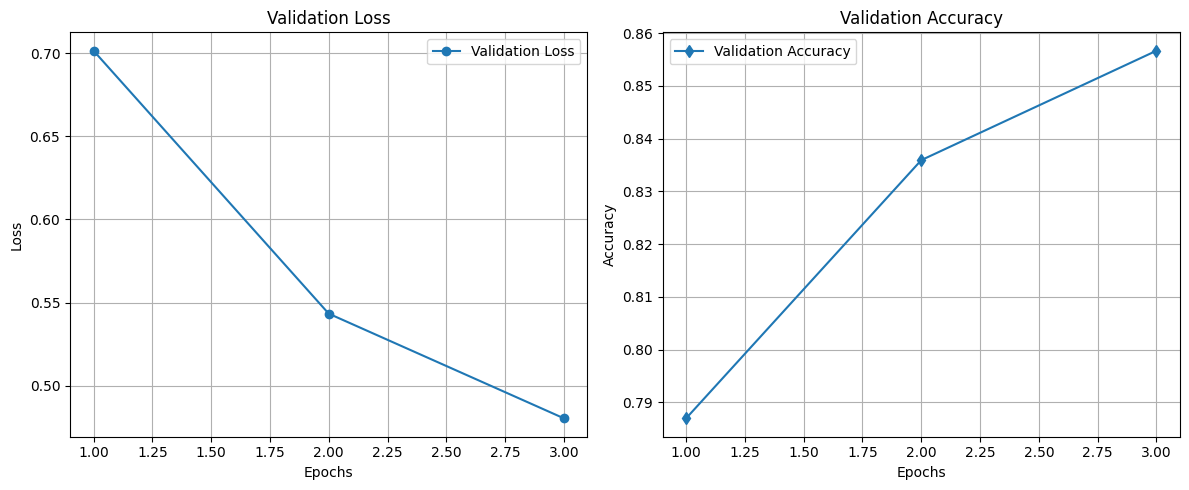

In [40]:
plot_training_progress(num_epochs, val_losses, val_accuracies)

In [49]:
def load_checkpoint(model, optimizer, checkpoint_path, scheduler=None):
    """
    Load model, optimizer, and training state from a checkpoint.
    """
    checkpoint = torch.load(checkpoint_path, map_location=device, weights_only=True)
    
    model.load_state_dict(checkpoint["model_state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
    epoch = checkpoint["epoch"]  # Resumes from next epoch

    if scheduler and "scheduler_state_dict" in checkpoint:
        scheduler.load_state_dict(checkpoint["scheduler_state_dict"])

    print(f"Checkpoint loaded: {checkpoint_path}")
    return epoch

In [40]:
def resume_training(model, optimizer, train_dataloader, val_dataloader, start_epoch, num_epochs, val_losses, val_accuracies):
    """
    Continues training from a saved checkpoint.
    """
    lr_scheduler = get_scheduler(
        name="linear", 
        optimizer=optimizer, 
        num_warmup_steps=0, 
        num_training_steps=num_epochs * len(train_dataloader)
    )

    # Resume training from the last saved epoch
    for epoch in range(start_epoch, num_epochs):  
        train(model, train_dataloader, optimizer, lr_scheduler, num_epochs, epoch)

        val_loss, val_accuracy = evaluate(model, val_dataloader)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        save_checkpoint(model, optimizer, epoch, val_loss, val_accuracy, scheduler=lr_scheduler)
    return val_losses, val_accuracies

In [ ]:
latest_checkpoint = "checkpoints/checkpoint_epoch_3.pt"

# Load model, optimizer, and scheduler from the checkpoint
start_epoch = load_checkpoint(model, optimizer, latest_checkpoint, scheduler=lr_scheduler)

Checkpoint loaded: checkpoints/checkpoint_epoch_3.pt (Resuming from epoch 3)


If you closed the notebook after training for several epochs, you can run the code block below to reload the validation losses and accuracies from the checkpoints and resume training for additional epochs. Otherwise, running this step is unnecessary.

In [42]:
val_losses = []
val_accuracies = []

# Get all checkpoint files (sorted by epoch number)
checkpoint_files = sorted(
    [f for f in os.listdir(checkpoint_dir) if f.startswith("checkpoint_epoch_")],
    key=lambda x: int(x.split("_")[-1].split(".")[0])  # Extract epoch number
)

# Loop through all checkpoint files and restore validation losses & accuracies
for checkpoint_file in checkpoint_files:
    checkpoint_path = os.path.join(checkpoint_dir, checkpoint_file)
    checkpoint = torch.load(checkpoint_path, map_location=device, weights_only=True)

    val_losses.append(checkpoint["loss"])
    val_accuracies.append(checkpoint["accuracy"])

In [43]:
print("Restored Validation Losses:", val_losses)
print("Restored Validation Accuracies:", val_accuracies)

Restored Validation Losses: [0.701473025249173, 0.5433680943365488, 0.4804242168063602]
Restored Validation Accuracies: [0.7869525187426016, 0.8359331842693674, 0.8566881494147047]


In [44]:
num_epochs = 5  # Increase epochs to continue training

val_losses, val_accuracies = resume_training(
    model=model,
    optimizer=optimizer,
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    start_epoch=start_epoch,  # Loaded from checkpoint
    num_epochs=num_epochs,
    val_losses=val_losses, 
    val_accuracies=val_accuracies
)

Epoch 4/5:   0%|          | 0/9504 [00:00<?, ?it/s]

Train Loss: 0.4714, Train Accuracy: 0.8450


Evaluating:   0%|          | 0/2376 [00:00<?, ?it/s]

Validation Loss: 0.5871, Validation Accuracy: 0.8285
Checkpoint saved: checkpoints\checkpoint_epoch_4.pt


Epoch 5/5:   0%|          | 0/9504 [00:00<?, ?it/s]

Train Loss: 0.3405, Train Accuracy: 0.8835


Evaluating:   0%|          | 0/2376 [00:00<?, ?it/s]

Validation Loss: 0.5626, Validation Accuracy: 0.8391
Checkpoint saved: checkpoints\checkpoint_epoch_5.pt


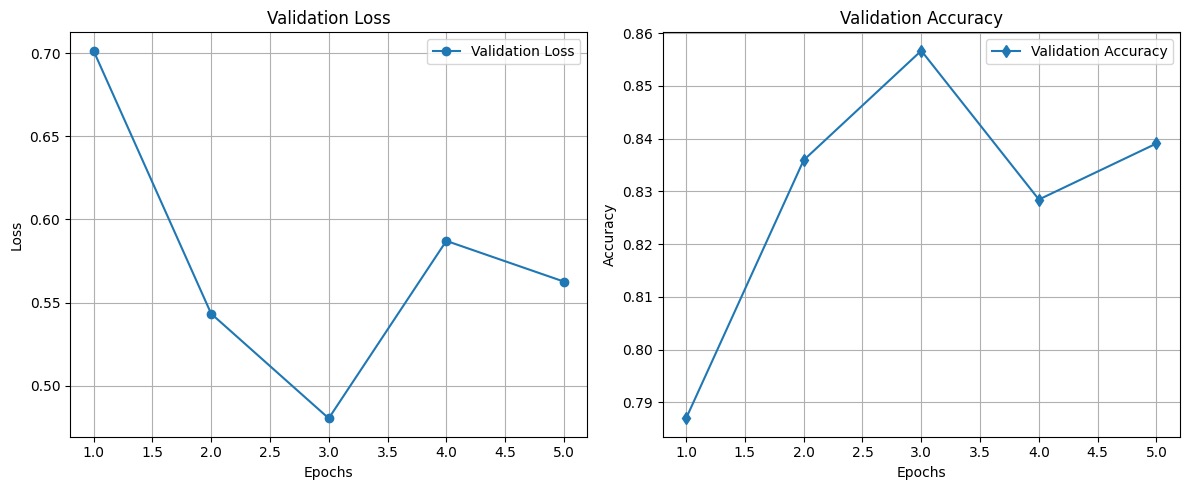

In [45]:
plot_training_progress(num_epochs, val_losses, val_accuracies)

Since validation loss increases and validation accuracy drops after epoch 3, overfitting likely starts at epoch 4.

In [50]:
best_checkpoint_path = "checkpoints/checkpoint_epoch_3.pt"
best_epoch = load_checkpoint(model, optimizer, best_checkpoint_path, scheduler=lr_scheduler)

Checkpoint loaded: checkpoints/checkpoint_epoch_3.pt


In [51]:
save_directory = "fine_tuned_mBERT"
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

print(f"Model saved to {save_directory}")

Model saved to fine_tuned_mBERT


## Evaluation

In [29]:
save_directory = "fine_tuned_mBERT"
model = AutoModelForSequenceClassification.from_pretrained(save_directory)
tokenizer = AutoTokenizer.from_pretrained(save_directory)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from collections import Counter
import seaborn as sns

In [31]:
def evaluate_and_get_predictions(model, val_dataloader):
    """
    Evaluate the model and return predictions & true labels.
    """
    model.eval()
    true_labels, pred_labels = [], []

    with torch.no_grad():
        for batch in tqdm(val_dataloader, desc="Evaluating"):
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)

            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)

            true_labels.extend(batch["labels"].cpu().numpy())  # Convert to list
            pred_labels.extend(predictions.cpu().numpy())

    return np.array(true_labels), np.array(pred_labels)

In [32]:
true_labels, pred_labels = evaluate_and_get_predictions(model, val_dataloader)

Evaluating:   0%|          | 0/2376 [00:00<?, ?it/s]

In [34]:
int_to_label = {v: k for k, v in label_to_int.items()}

true_labels = [int_to_label[label] for label in true_labels]
pred_labels = [int_to_label[label] for label in pred_labels]

In [35]:
label_counts = Counter(true_labels)
top_10_classes = [label for label, _ in label_counts.most_common(10)]

print("Top 10 Most Frequent Classes:", top_10_classes)

Top 10 Most Frequent Classes: ['tgk', 'bak', 'tat', 'crh', 'srp', 'aze', 'uzb', 'uig', 'kat', 'hin']


In [36]:
# Filter the labels for the top 10 classes
filtered_indices = [i for i in range(len(true_labels)) if true_labels[i] in top_10_classes]

filtered_true = [true_labels[i] for i in filtered_indices]
filtered_pred = [pred_labels[i] for i in filtered_indices]

report = classification_report(filtered_true, filtered_pred, labels=top_10_classes, target_names=top_10_classes)
print(report)

              precision    recall  f1-score   support

         tgk       0.86      0.33      0.47       300
         bak       0.79      0.76      0.78       200
         tat       0.85      0.67      0.75       200
         crh       0.99      0.90      0.94       200
         srp       1.00      0.62      0.77       200
         aze       0.95      0.68      0.79       200
         uzb       0.69      0.77      0.73       200
         uig       0.98      0.83      0.90       200
         kat       0.99      0.87      0.93       200
         hin       0.99      0.66      0.79       200

   micro avg       0.90      0.69      0.78      2100
   macro avg       0.91      0.71      0.78      2100
weighted avg       0.91      0.69      0.77      2100



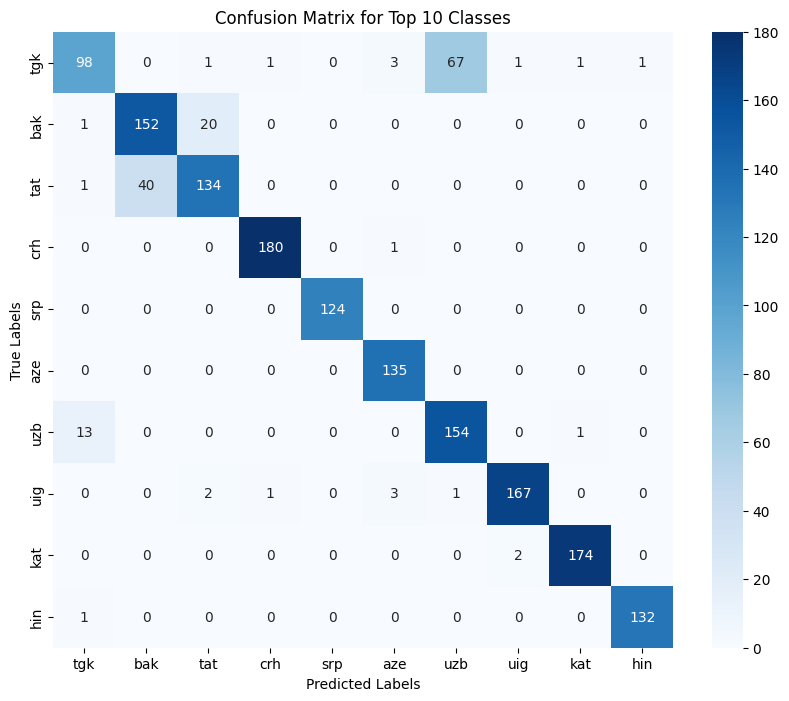

In [37]:
# Compute confusion matrix
cm = confusion_matrix(filtered_true, filtered_pred, labels=top_10_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=top_10_classes, yticklabels=top_10_classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Top 10 Classes")
plt.show()


## Submission

In [ ]:
test_df = pd.read_csv("test_without_labels.csv")
test_df.info()

In [54]:
class TestDataset(Dataset):
    def __init__(self, texts, tokenizer, max_length=256):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        encoding = self.tokenizer(text, padding="max_length", truncation=True, max_length=self.max_length, return_tensors="pt")
        
        return {key: val.squeeze(0) for key, val in encoding.items()}

In [57]:
# Create dataset & dataloader
test_dataset = TestDataset(test_df["Text"].tolist(), tokenizer)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [58]:
def predict_labels(dataloader, model, device):
    """
    Predicts labels for a DataLoader using batch processing.
    """
    model.eval()  # Set model to evaluation mode
    predictions = []

    with torch.no_grad():
        for batch in dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            logits = outputs.logits
            batch_predictions = torch.argmax(logits, dim=-1).cpu().tolist()  # Convert to list
            predictions.extend(batch_predictions)

    return predictions

In [59]:
test_df["Label"] = predict_labels(test_dataloader, model, device)

In [73]:
# Create a reverse mapping: from integer back to label type
int_to_label = {v: k for k, v in label_to_int.items()}
test_df["Label"] = test_df["Label"].map(int_to_label)

In [68]:
test_df["ID"] = range(1, len(test_df) + 1)

In [74]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190567 entries, 0 to 190566
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Usage   190567 non-null  object
 1   Text    190567 non-null  object
 2   Label   190567 non-null  object
 3   ID      190567 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.8+ MB


In [75]:
submission_df = test_df[["ID", "Label"]]

In [76]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190567 entries, 0 to 190566
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      190567 non-null  int64 
 1   Label   190567 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.9+ MB


In [77]:
submission_file_path = "submission.csv"
submission_df.to_csv(submission_file_path, index=False)

print(f"Predictions saved to {submission_file_path}")

Predictions saved to submission.csv
